# Yelp Yodelers
### Understanding and Predicting Business Success Using Yelp Data

## Problem Statement

The challenge lies in leveraging Yelp data to gain insights into factors that contribute to the success of restaurants and predicting the success of new or existing restaurants based on various features and attributes.

## Dataset Overview

<b>Data source:</b> https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset 
Original source: https://www.yelp.com/dataset 

This dataset contains 5 JSON files, details below.

1. `business.json` - Contains business data including location data, attributes, and categories.
1. `review.json` - Contains full review text data including the user_id that wrote the review and the business_id the review is written for.
1. `user.json` - User data including the user's friend mapping and all the metadata associated with the user.
1. `checkin.json` - Checkins on a business.
1. `tip.json` - Tips written by a user on a business. Tips are shorter than reviews and tend to convey quick suggestions.

**Primarily our problem statement to identify whether a business opened in a particular location will be succeffull or not would be trained on the `business` data**

#### Quick dataset overview

In [73]:
# import libraries
import pandas as pd

In [74]:
# Load Yelp dataset
yelp_df_business = pd.read_json("https://github.com/ashrithagoramane/INFO7390/raw/main/data/raw_data/yelp_academic_dataset_business.json",lines=True)

### Business data

* `business_id`: Unique identifier for each business in the dataset.
* `name`: Name of the business.
* `address`: Street address of the business location.
* `city`: City where the business is located.
* `state`: State where the business is located.
* `postal_code`: Postal code (ZIP code) of the business location.
* `latitude`: Geographic latitude coordinate of the business.
* `longitude`: Geographic longitude coordinate of the business.
* `stars`: Rating or score assigned to the business.
* `review_count`: Number of reviews the business has received.
* `is_open`: Indicator of whether the business is currently open (binary: 1 for open, 0 for closed).
* `attributes`: Additional attributes or features of the business.
* `categories`: Categories or types of services/products offered by the business.
* `hours`: Operating hours of the business (e.g., opening and closing times).

In [75]:
# Display first few rows of the dataset
yelp_df_business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."


## Step 1: Data Preprocessing NoteBook
Preprocessing of Dataset for Yelp business

In [76]:
# Import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import json_normalize

In [77]:
business_df = pd.read_json("https://github.com/ashrithagoramane/INFO7390/raw/main/data/raw_data/yelp_academic_dataset_business.json",lines=True)

# Intital view of Data, its attributes and information on the type of data, size

In [78]:
business_df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [79]:
# Size of the dataset, it has 100K rows and 14 Columns
business_df.shape, business_df.business_id.nunique()

((150346, 14), 150346)

In [80]:
# Brief information on the columns
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [81]:
# Info for numerical columns of the dataset
business_df.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


## Handling Null values
#### The most important part of data preprocessing is handling missing values in order to get clean and transformed data to perform analysis and data modelling
#### The below step helps us understand the percentage of missing values in each attribute of dataset.

In [82]:
# Null values in the dataset
null_perc=(business_df.isnull().sum()/business_df.isnull().count()) *100
null_perc

business_id      0.000000
name             0.000000
address          0.000000
city             0.000000
state            0.000000
postal_code      0.000000
latitude         0.000000
longitude        0.000000
stars            0.000000
review_count     0.000000
is_open          0.000000
attributes       9.141580
categories       0.068509
hours           15.446370
dtype: float64

Based on above observation we got to know that 3 columns have null values that are `attributes`, `categories` and `hours`. Based on the number we can see that the percenatage of null values overall in categories is approx 0 where as for attributes and categories it is 9% and 15% and since these values are specfic information related to business any fill method would either skew data to a particular class or might randomize the decision so since the overall percentage is less that 25% we can drop the data will null values

In [83]:
# Replace string 'None' with NaN and drop it using dropna function
business_df.replace('None', np.nan, inplace=True)
business_df.dropna(inplace=True)
business_df.shape

(117618, 14)

Post dropping the value we can see there are **no null values** in the data and we can move ahead with tranforming it

In [84]:
business_df['attributes'].isnull().sum()

0

In [85]:
null_perc=(business_df.isnull().sum()/business_df.isnull().count()) *100
null_perc

business_id     0.0
name            0.0
address         0.0
city            0.0
state           0.0
postal_code     0.0
latitude        0.0
longitude       0.0
stars           0.0
review_count    0.0
is_open         0.0
attributes      0.0
categories      0.0
hours           0.0
dtype: float64

Categories column had string values which categorized each business in a type with each business can belong to various categories. Since the values where in string it made each value as single string thereby making it difficult to break down categories or to understand different categories so to handle this used the apply funtion of Data frame to do a string comprehension and convert every record in a list of value therby making a single list entity and easier to traverse and work on

In [86]:
business_df['categories'] = business_df['categories'].apply(lambda x: sorted(x.split(", ")) if x is not None else list())

In [87]:
business_df['categories'].head()

1    [Local Services, Mailbox Centers, Notaries, Pr...
2    [Department Stores, Electronics, Fashion, Furn...
3    [Bakeries, Bubble Tea, Coffee & Tea, Food, Res...
4                          [Breweries, Brewpubs, Food]
5    [Burgers, Fast Food, Food, Ice Cream & Frozen ...
Name: categories, dtype: object

In [88]:
business_df['categories'][1]

['Local Services',
 'Mailbox Centers',
 'Notaries',
 'Printing Services',
 'Shipping Centers']

# Conclusion
* Data preprocessing is the process of handling missing data, making it clean and tranformed as it acts as base for decision making. As part of Data preprocessing major focus was to handle null and noise in data and tranform into standard format.
* Storing the data in a csv which can be used further for exploratory data analysis and feature engineering

In [89]:
business_df.to_csv("../data/processed_data/preprocessed_business.csv", index=False)

# Step 2: Exploratory Data Analysis

In [90]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [91]:
# Load the preprocessed clean data
business_df = pd.read_csv('../data/processed_data/preprocessed_business.csv')
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"['Local Services', 'Mailbox Centers', 'Notarie...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
1,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","['Department Stores', 'Electronics', 'Fashion'...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","['Bakeries', 'Bubble Tea', 'Coffee & Tea', 'Fo...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
3,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","['Breweries', 'Brewpubs', 'Food']","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
4,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","['Burgers', 'Fast Food', 'Food', 'Ice Cream & ...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."


# Univariate Analysis

### Numerical columns analysis

In [92]:
business_df.review_count.describe()

count    117618.000000
mean         52.958238
std         135.126694
min           5.000000
25%           9.000000
50%          18.000000
75%          46.000000
max        7568.000000
Name: review_count, dtype: float64

<Axes: xlabel='review_count', ylabel='Count'>

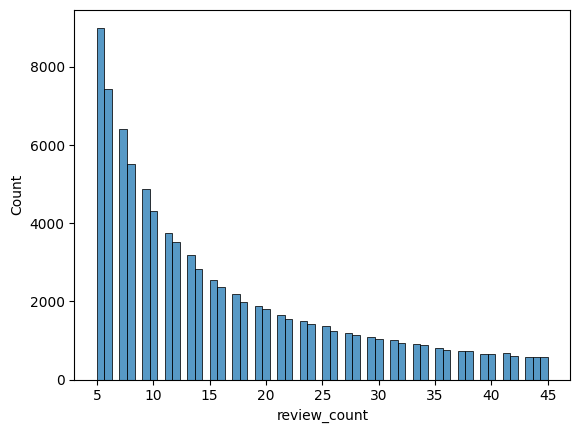

In [93]:
# Ploting the histogram for first three quartiles of review count to have visibility
sns.histplot(business_df[business_df['review_count'] < 46].review_count)

**Interpretation of above graph:** The number of reviews plays a crucial role in gauging a business's success. For instance, a business may have an average rating but a large volume of feedback, indicating success. Conversely, a business with only one review and a high rating may not be well-established.

### Categorical Data Analysis

We will find insights on the categorical columns in the dataset i.e. `categories`  `attributes` `state`


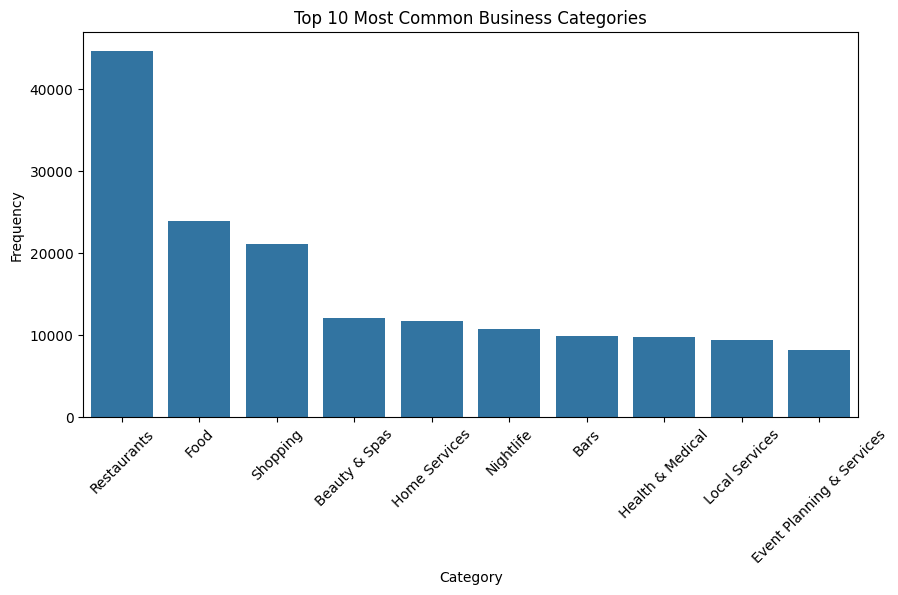

In [94]:
from collections import Counter

# Splitting the categories and creating a flattened list
categories = business_df['categories'].dropna().apply(lambda x: x.strip('[]').split(','))
flattened_categories = [item.strip(' \'') for sublist in categories for item in sublist]

# Counting category occurrences
category_counts = Counter(flattened_categories)
most_common_categories = category_counts.most_common(10)

# Bar plot for the most common categories
plt.figure(figsize=(10, 5))
sns.barplot(x=[x[0] for x in most_common_categories], y=[x[1] for x in most_common_categories])
plt.xticks(rotation=45)
plt.title('Top 10 Most Common Business Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

The above chart gives details about the categories each business belongs to, and majority of our data includes the business in field of Food and Restaurants.

<Figure size 1600x800 with 0 Axes>

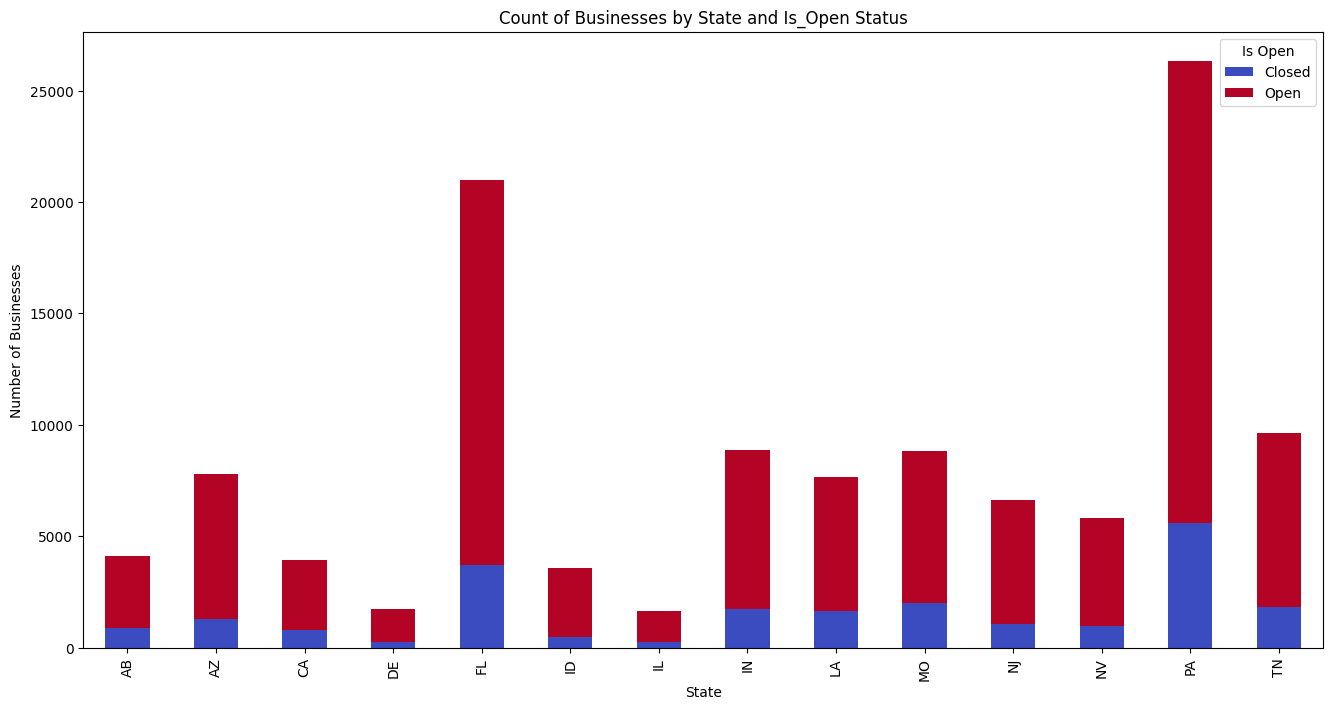

In [95]:
# Count of businesses by state and is_open status
state_is_open_counts = business_df.groupby(['state', 'is_open']).size().unstack().dropna()

# Create bar plot
plt.figure(figsize=(16, 8))
state_is_open_counts.plot(kind='bar', stacked=True, figsize=(16, 8), cmap='coolwarm')
plt.title('Count of Businesses by State and Is_Open Status')
plt.xlabel('State')
plt.ylabel('Number of Businesses')
plt.legend(title='Is Open', labels=['Closed', 'Open'], loc='upper right')
plt.show()

##### **Point Plot** - The code generates a point plot using Seaborn's pointplot function to visualize the relationship between star ratings (x='stars') and average review counts (y='review_count') for businesses in the business_df DataFrame. Each point represents the average review count for businesses with a particular star rating.

The Point plot below shows a generally positive correlation between star ratings and average review counts, indicating that businesses with higher ratings tend to have more reviews. However, there are some outliers, suggesting that other factors may also influence review counts.

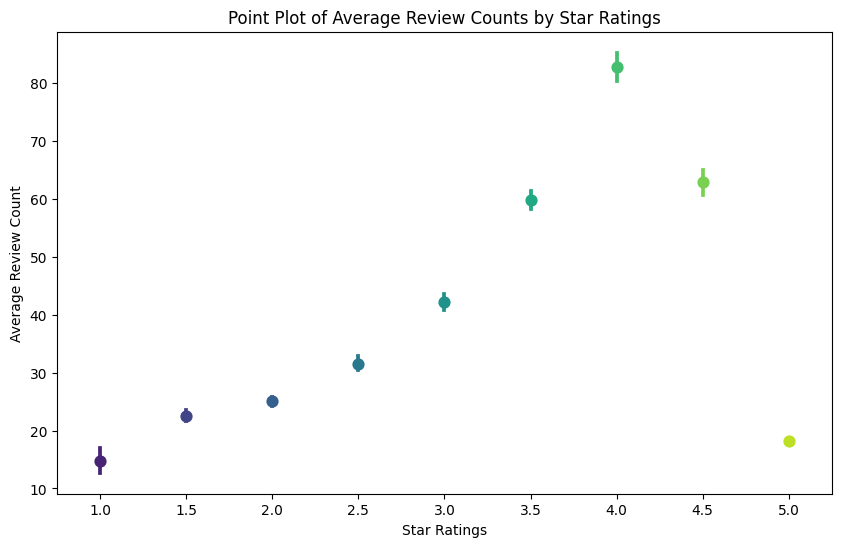

In [96]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='stars', y='review_count', data=business_df, palette='viridis', join=False)
plt.title('Point Plot of Average Review Counts by Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Average Review Count')
plt.show()

#### This code generates a count plot using Seaborn's countplot function to visualize the distribution of business ratings (in stars) in the business_df DataFrame. Each bar in the plot represents the number of businesses that received a specific star rating.

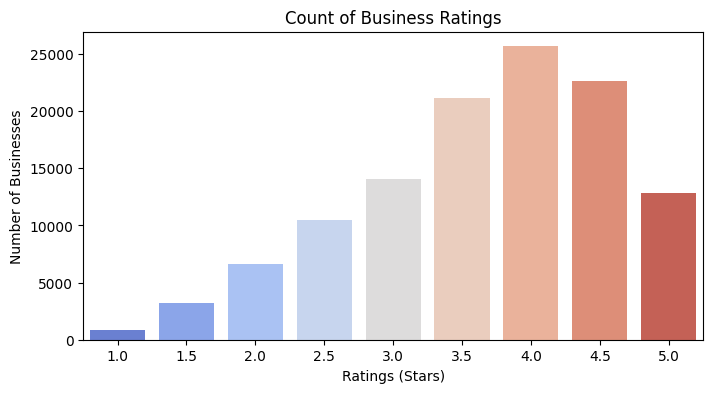

In [97]:
plt.figure(figsize=(8, 4))
sns.countplot(x='stars', data=business_df, palette='coolwarm')
plt.title('Count of Business Ratings')
plt.xlabel('Ratings (Stars)')
plt.ylabel('Number of Businesses')
plt.show()

##### This code creates a horizontal bar chart using Plotly Express to display the top 10 states with the most businesses, with each bar colored based on the number of businesses in the state, using the 'inferno' color scale.

In [98]:
# Assuming business_df contains the actual data
top_states = business_df['state'].value_counts().nlargest(10).reset_index()
top_states.columns = ['state', 'count']

# Create horizontal bar chart with custom color palette
fig = px.bar(
    top_states,
    x='count',
    y='state',
    orientation='h',
    title='Top 10 States with Most Number of Businesses',
    labels={'count': 'Number of Businesses', 'state': 'State'},
    color='count',
    color_continuous_scale='inferno' 
)

fig.show()

##### This code generates a heatmap of the correlation matrix for the numeric columns in the business_df DataFrame

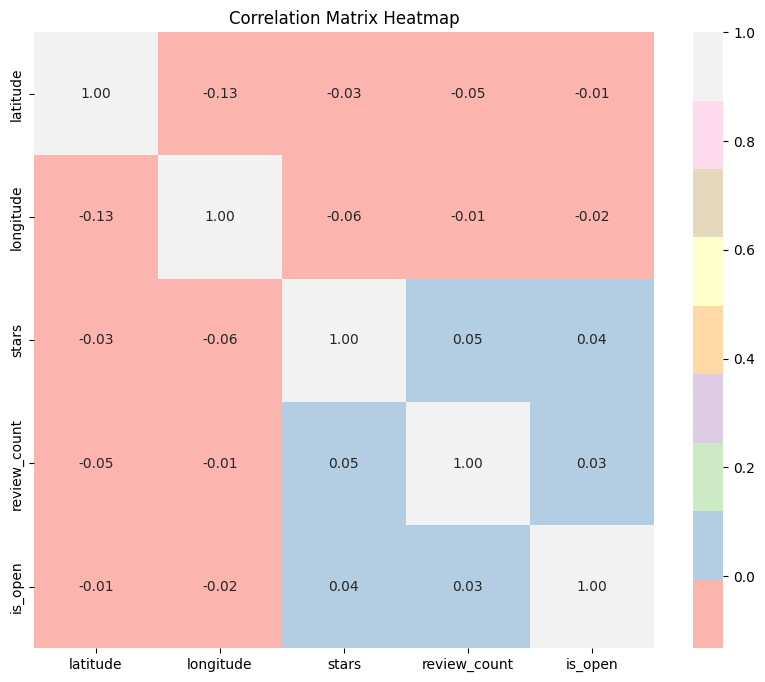

In [99]:

# Select only the numeric columns for the correlation matrix
numeric_cols = business_df.select_dtypes(include=[np.number])

# Generating the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='Pastel1')
plt.title('Correlation Matrix Heatmap')
plt.show()

##### This code creates a stacked bar chart to show the count of businesses based on their star ratings and whether they are open or closed, providing a visual comparison of the distribution of businesses across different star ratings and their open/closed status.

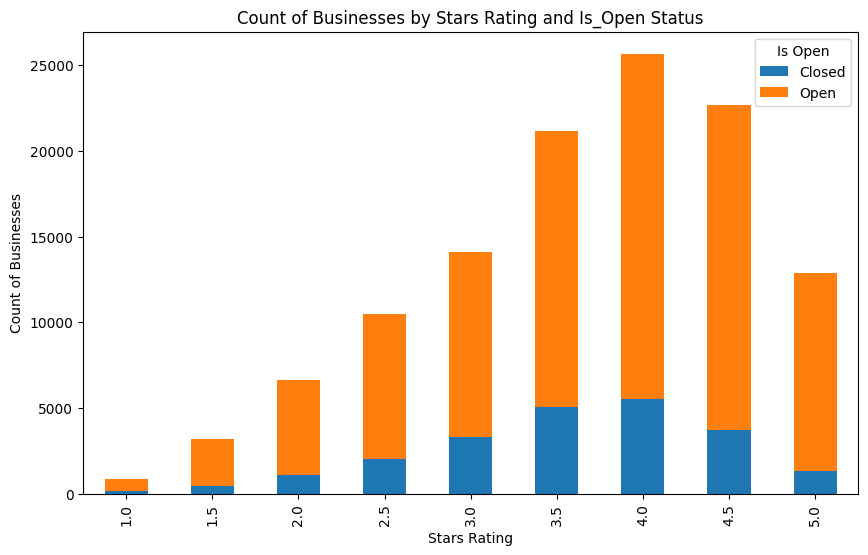

In [100]:
#  Stacked Bar Chart
stars_is_open = pd.crosstab(business_df['stars'], business_df['is_open'])
stars_is_open.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Businesses by Stars Rating and Is_Open Status')
plt.xlabel('Stars Rating')
plt.ylabel('Count of Businesses')
plt.legend(title='Is Open', labels=['Closed', 'Open'])
plt.show()

##### This code generates a boxplot to visualize the distribution of review counts for open and closed businesses, allowing for a comparison of the review count distribution between open and closed businesses.

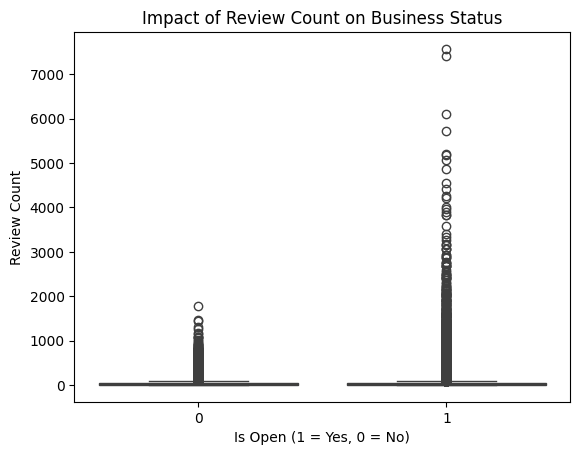

In [101]:
sns.boxplot(x='is_open', y='review_count', data=business_df)
plt.title('Impact of Review Count on Business Status')
plt.xlabel('Is Open (1 = Yes, 0 = No)')
plt.ylabel('Review Count')
plt.show()


# Step 3: Feature Engineering

In [102]:
# Import modules
import pandas as pd
import numpy as np
import ast
from pandas import json_normalize

In [103]:
# Load preprocessed data
yelp_df_business = pd.read_csv('../data/processed_data/preprocessed_business.csv')
yelp_df_business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"['Local Services', 'Mailbox Centers', 'Notarie...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
1,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","['Department Stores', 'Electronics', 'Fashion'...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


In [104]:
processed_data = yelp_df_business.copy()
processed_data.shape

(117618, 14)

### Our target variable to define whether a business would be successfull or not
**Approach 1:** The stars can be our target variable, but solely stars cannot define the success, since if 1 review is a 5 star rating then it hasn't reached the crowd yet

**Approach 2:** The stars combined with review count can be a good scale to measure the eventual success of a business

#### Since Approach 2 is more holistic, we will combine the star rating and review count into a single metric. Multiply the star rating by the logarithm of the review count to give more weight to businesses with higher ratings and a significant number of reviews.



In [105]:
# This formula ensures that businesses with higher ratings and more reviews get a higher composite rating, reflecting a higher level of success.
processed_data["composite_rating"] = processed_data.stars * np.log(processed_data.review_count + 1)
processed_data.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,composite_rating
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"['Local Services', 'Mailbox Centers', 'Notarie...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",8.317766
1,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","['Department Stores', 'Electronics', 'Fashion'...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",10.974230


In [106]:
# Remove old columns
# processed_data = processed_data.drop(columns=['stars', 'review_count'])
processed_data.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'composite_rating'],
      dtype='object')

### Operational hours
The hours columns gives a dictionary with hours the business is open for each day in a week. This can be used into our modelling by computing total number of operational hours in a week

In [107]:
from datetime import datetime

def operational_hours(hours: dict = None):
    if not hours:
        return None
    operational_seconds = 0
    for day, time in hours.items():
        start_time_str, end_time_str = time.split('-')
        start_time = datetime.strptime(start_time_str, '%H:%M')
        end_time = datetime.strptime(end_time_str, '%H:%M')
        if end_time < start_time:
            operational_seconds += 24*3600 - (start_time - end_time).total_seconds()
        else:
            operational_seconds += (end_time - start_time).total_seconds()
        
    return operational_seconds/3600

In [108]:
processed_data["hours"] = processed_data["hours"].apply(lambda x: ast.literal_eval(x))
processed_data["operational_hours"] = processed_data["hours"].apply(operational_hours)
processed_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,composite_rating,operational_hours
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"['Local Services', 'Mailbox Centers', 'Notarie...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",8.317766,48.0
1,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","['Department Stores', 'Electronics', 'Fashion'...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",10.974230,100.0
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","['Bakeries', 'Bubble Tea', 'Coffee & Tea', 'Fo...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",17.577797,94.0
3,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","['Breweries', 'Brewpubs', 'Food']","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",11.875758,40.0
4,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","['Burgers', 'Fast Food', 'Food', 'Ice Cream & ...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",3.891820,90.0


Adding EveryWeekDay hours

In [109]:
for col in processed_data.columns:
    if col.startswith('hours_'):
        processed_data[col] = processed_data[col].replace('0:0-0:0', pd.NaT)

# Handle missing values or fill with defaults if necessary
processed_data.fillna({'hours_Monday': 'Closed', 'hours_Tuesday': 'Closed', 'hours_Wednesday': 'Closed','hours_Thursday': 'Closed','hours_Friday': 'Closed','hours_Saturday': 'Closed','hours_Sunday': 'Closed'}, inplace=True)

### Categories

In [110]:
processed_data['categories'] = processed_data.categories.apply(lambda x: ast.literal_eval(x))

In [111]:
tag_columns = pd.get_dummies(processed_data.categories.apply(pd.Series).stack()).sum(level=0)
tag_columns

,& Probates,3D Printing,ATV Rentals/Tours,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,Acupuncture,Addiction Medicine,...,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Workers Compensation Law,Wraps,Yelp Events,Yoga,Ziplining,Zoos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
all_tags = tag_columns.astype(bool).sum(axis=0).sort_values(ascending=False)
all_tags.head(20)

Restaurants                  44676
Food                         23910
Shopping                     21053
Beauty & Spas                12038
Home Services                11760
Nightlife                    10777
Bars                          9882
Health & Medical              9821
Local Services                9351
Event Planning & Services     8137
Automotive                    8083
Sandwiches                    7623
American (Traditional)        7419
Coffee & Tea                  6186
Pizza                         6026
Fast Food                     5959
Breakfast & Brunch            5861
Active Life                   5842
American (New)                5511
Burgers                       5199
dtype: int64

##### The tags associated with less than 5% of the businesses can be omitted

In [113]:
top_tags = all_tags[all_tags > 0.05 * processed_data.shape[0]]
print(len(all_tags), len(top_tags))

1291 16


In [114]:
top_tag_columns = tag_columns[top_tags.index]
processed_data = pd.concat([processed_data, top_tag_columns], axis=1)
processed_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Bars,Health & Medical,Local Services,Event Planning & Services,Automotive,Sandwiches,American (Traditional),Coffee & Tea,Pizza,Fast Food
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,0,0,1,0,0,0,0,0,0,0
1,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,0,0,0,0,0,0,0,0,0,0
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,0,0,0,0,0,0,0,1,0,0
3,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,0,0,0,0,0,0,0,0,0,0
4,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,0,0,0,0,0,1,0,0,0,1


### Attributes column

In [115]:
# Define a function to safely evaluate whether the content is a string representation of a dictionary
def safe_eval(x):
    if isinstance(x, dict):
        return x
    try:
        return eval(x)
    except (TypeError, SyntaxError):
        return None

In [116]:
# Apply the safe_eval function to the 'attributes' column and then normalize it
# Note: This is a simplified example. If 'attributes' contains nested dictionaries, you may need a more complex approach
processed_data['attributes'] = processed_data['attributes'].apply(safe_eval)
attributes_expanded = json_normalize(processed_data['attributes'].tolist())
attributes_expanded.head(2)

,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,BusinessParking,WheelchairAccessible,...,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,True,2,False,False,False,False,u'no',"{'garage': False, 'street': False, 'validated'...",True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
nan_percentage = attributes_expanded.isna().mean() * 100

# Drop columns where NaN percentage is more than 50%
columns_to_drop = nan_percentage[nan_percentage > 50].index
attributes_expanded.drop(columns=columns_to_drop, inplace=True)
attributes_expanded.columns

Index(['BusinessAcceptsCreditCards', 'BikeParking', 'RestaurantsPriceRange2',
       'BusinessParking'],
      dtype='object')

#### BusinessParking expand

In [118]:
attributes_expanded['BusinessParking'] = attributes_expanded['BusinessParking'].apply(safe_eval)
businessparking_expanded = json_normalize(attributes_expanded['BusinessParking'].tolist())
businessparking_expanded.head(2)

,garage,street,validated,lot,valet
0,NaN,NaN,NaN,NaN,NaN
1,False,False,False,True,False


In [119]:
# Join all the new columns
processed_data = pd.concat([processed_data, attributes_expanded, businessparking_expanded], axis=1)

In [120]:
processed_data.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'composite_rating',
       'operational_hours', 'Restaurants', 'Food', 'Shopping', 'Beauty & Spas',
       'Home Services', 'Nightlife', 'Bars', 'Health & Medical',
       'Local Services', 'Event Planning & Services', 'Automotive',
       'Sandwiches', 'American (Traditional)', 'Coffee & Tea', 'Pizza',
       'Fast Food', 'BusinessAcceptsCreditCards', 'BikeParking',
       'RestaurantsPriceRange2', 'BusinessParking', 'garage', 'street',
       'validated', 'lot', 'valet'],
      dtype='object')

##### Cleaning the newly formed features

In [121]:
processed_data.replace({'None': None},inplace=True)
processed_data['BusinessAcceptsCreditCards'].fillna(False, inplace=True)

processed_data.replace({True: 1, False: 0}, inplace=True)
processed_data.replace({'True': 1, 'False': 0}, inplace=True)

processed_data['BusinessAcceptsCreditCards'].value_counts()

1    100642
0     16976
Name: BusinessAcceptsCreditCards, dtype: int64

In [122]:
processed_data.dropna(inplace=True)
features = ["latitude", "longitude", "operational_hours", "is_open", "Restaurants", "Food", "Bars", "garage"]

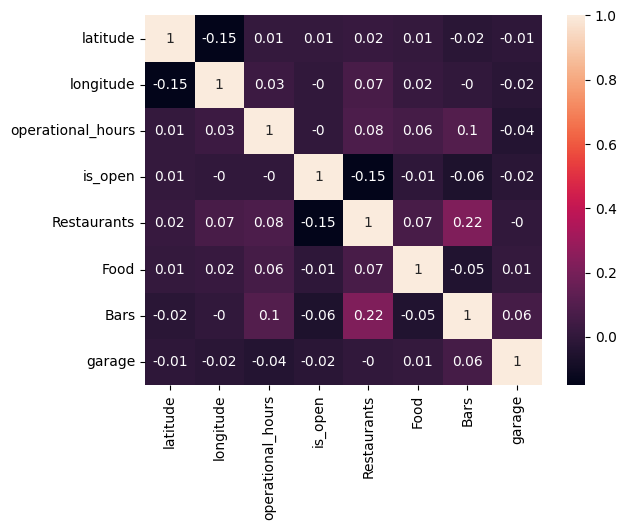

In [123]:
# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns

#ploting the heatmap for correlation
ax = sns.heatmap(processed_data[features].corr().round(2), annot=True) 

# Data normalization

Data normalization ensures fair contribution of features by scaling them to similar ranges, aiding model training, reducing bias, improving convergence, and enhancing interpretability and generalization.

##### For our data we will be using Min-Max normalization

In [124]:
from sklearn.preprocessing import MinMaxScaler

X = processed_data[features]

# scale features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

# print scaled features
print(scaled_data)

[[0.17889165 0.20262968 0.59565174 ... 0.         0.         0.        ]
 [0.4752083  0.9891873  0.55991264 ... 1.         0.         0.        ]
 [0.42432385 0.65486016 0.2739998  ... 0.         0.         0.        ]
 ...
 [0.32803667 0.73353907 0.38121712 ... 0.         0.         0.        ]
 [0.43025058 0.66344477 0.41695622 ... 0.         0.         0.        ]
 [0.00827278 0.82979807 0.20847811 ... 0.         0.         0.        ]]


In [125]:
processed_data.to_csv("../data/processed_data/train_data_business.csv", index=False)

# Step 4: Model Training - BaselineModel

##### Linear regression provides a simple, interpretable baseline for comparison with more complex models, assuming a linear relationship between features and target for initial pattern exploration.Hence training a LinearRegressor

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [127]:
# Load data
yelp_df_business = pd.read_csv('../data/processed_data/train_data_business.csv')
yelp_df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Fast Food,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,BusinessParking,garage,street,validated,lot,valet
0,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,0,1,1.0,2,"{'garage': False, 'street': False, 'validated'...",0.0,0.0,0.0,1.0,0.0
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,0,0,1.0,1,"{'garage': False, 'street': True, 'validated':...",0.0,1.0,0.0,0.0,0.0
2,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,...,0,1,1.0,2,"{'garage': False, 'street': False, 'validated'...",0.0,0.0,0.0,1.0,0.0
3,UJsufbvfyfONHeWdvAHKjA,Marshalls,21705 Village Lakes Sc Dr,Land O' Lakes,FL,34639,28.190459,-82.457380,3.5,6,...,0,1,1.0,2,"{'garage': False, 'street': False, 'validated'...",0.0,0.0,0.0,0.0,0.0
4,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,...,0,1,1.0,1,"{'garage': False, 'street': False, 'validated'...",0.0,0.0,0.0,1.0,0.0


In [128]:
# Print all column names to check what's available
print(yelp_df_business.columns)

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'composite_rating',
       'operational_hours', 'Restaurants', 'Food', 'Shopping', 'Beauty & Spas',
       'Home Services', 'Nightlife', 'Bars', 'Health & Medical',
       'Local Services', 'Event Planning & Services', 'Automotive',
       'Sandwiches', 'American (Traditional)', 'Coffee & Tea', 'Pizza',
       'Fast Food', 'BusinessAcceptsCreditCards', 'BikeParking',
       'RestaurantsPriceRange2', 'BusinessParking', 'garage', 'street',
       'validated', 'lot', 'valet'],
      dtype='object')


In [129]:
# Selecting all numerical columns as predictors
X = yelp_df_business.select_dtypes(include=['float64', 'int64'])

In [130]:
columns_to_drop = ["stars", "composite_rating", "review_count"]


In [131]:
# Removing the 'stars' column from the predictors
X = X.drop(columns=columns_to_drop)
y = yelp_df_business.composite_rating

In [132]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [133]:
# Creating the linear regression model
model = LinearRegression()

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

In [134]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 17.991554265902753
R^2 Score: 0.40692817101920553


# Step 4: Model Training - Random Forest

##### Next trying out a random forest regressor as given the dataset's features like latitude, longitude, review count, and business categories, a Random Forest Regressor can better capture complex spatial and categorical relationships, potentially leading to improved predictions of business performance compared to a linear model.

In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [136]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51164 entries, 0 to 51163
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   latitude                    51164 non-null  float64
 1   longitude                   51164 non-null  float64
 2   is_open                     51164 non-null  int64  
 3   operational_hours           51164 non-null  float64
 4   Restaurants                 51164 non-null  int64  
 5   Food                        51164 non-null  int64  
 6   Shopping                    51164 non-null  int64  
 7   Beauty & Spas               51164 non-null  int64  
 8   Home Services               51164 non-null  int64  
 9   Nightlife                   51164 non-null  int64  
 10  Bars                        51164 non-null  int64  
 11  Health & Medical            51164 non-null  int64  
 12  Local Services              51164 non-null  int64  
 13  Event Planning & Services   511

In [137]:
# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_regressor.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R^2: {rf_r2}")

Random Forest MSE: 15.324853859662834
Random Forest R^2: 0.4948330214783929


### Hyperparameter tuning using GridSearch for randomforest model

In [138]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf_regressor = RandomForestRegressor(random_state=42)

# Set up the parameter grid to tune
param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10],  # Maximum number of levels in each decision tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required at each leaf node
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
rf_predictions = best_rf.predict(X_test)

# Evaluate the best model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Optimized Random Forest MSE: {rf_mse}")
print(f"Optimized Random Forest R^2: {rf_r2}")

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   6.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   5.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estim

# Step 4: Model Training - XGBoost

XGBoost is selected due to its capability to handle complex relationships, feature importance analysis, and potential improvement in predictive accuracy compared to Random Forest, providing a step towards optimizing model performance

In [139]:
# Necessary imports 
import numpy as np 
import xgboost as xg 
from sklearn.metrics import mean_squared_error as MSE 
import matplotlib.pyplot as plt

In [140]:
def train_eval_xgboost(learning_rate: int = 0.1):
    print(f"Training the XGBoost regressor with learning rate {learning_rate}")
    
    # Instantiation 
    xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                    n_estimators = 10, seed = 123, 
                    learning_rate=learning_rate, 
                    max_depth=6) 
    
    # Fitting the model 
    xgb_r.fit(X_train, y_train) 
    
    # Predict the model 
    pred = xgb_r.predict(X_test) 
    
    # RMSE Computation 
    rmse = np.sqrt(MSE(y_test, pred)) 
    print(f"RMSE : {rmse}")
    # plot
    plt.bar(range(len(xgb_r.feature_importances_)), xgb_r.feature_importances_)
    plt.title(f"Feature importance with learning rate {learning_rate}")
    plt.show()

#### XGBoost regressor with hyperparameter tuning

Training the XGBoost regressor with learning rate 0.1
RMSE : 4.300718135615203


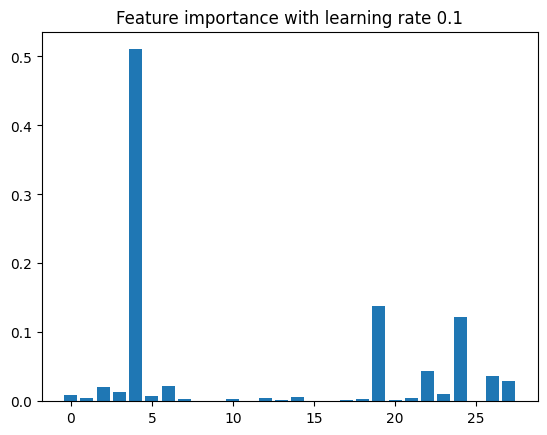

Training the XGBoost regressor with learning rate 0.3
RMSE : 3.9349193580268684


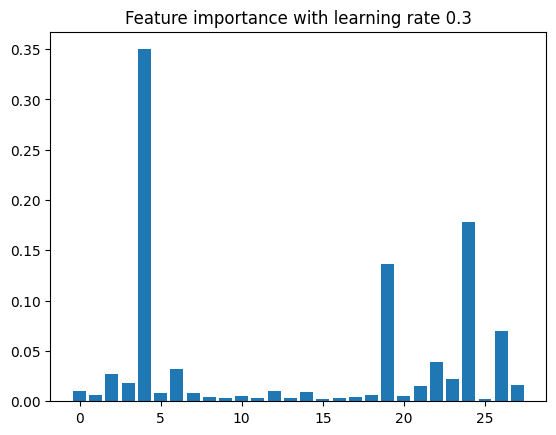

Training the XGBoost regressor with learning rate 0.5
RMSE : 3.875592171382314


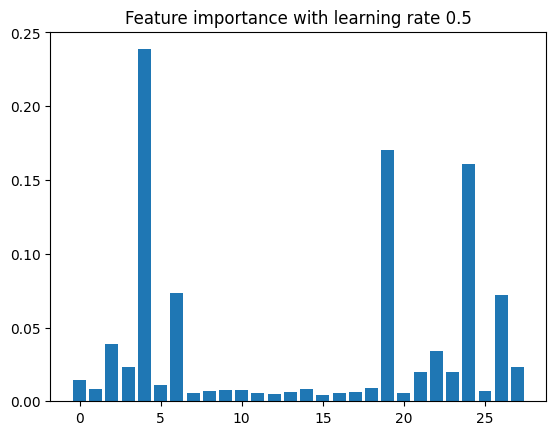

Training the XGBoost regressor with learning rate 0.8
RMSE : 3.9291558439697876


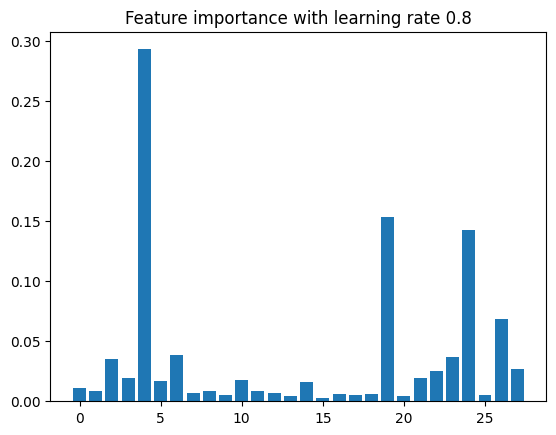

In [141]:
# Default parameters
train_eval_xgboost()

# XGBoost with 0.3 learning_rate
train_eval_xgboost(learning_rate=0.3)

# XGBoost with 0.6 learning_rate
train_eval_xgboost(learning_rate=0.5)

# XGBoost with 0.6 learning_rate
train_eval_xgboost(learning_rate=0.8)

The model with 0.5 learning rate and default depth of the tree of 6 gives the optimum value for RMSE which can be chose for final model training

# Conclusion - Model selection

After comparing Linear Regression, Random Forest Regressor, and XGBoost, XGBoost (with learning_rate 0.5, max_depth=6) emerges as the preferred model for predicting business performance based on the provided dataset.

##### Reason for Choosing XGBoost:
XGBoost outperformed the other models in terms of predictive accuracy and robustness, especially considering the dataset's complex categorical relations. It was able to take into account and handle the feature importance and optimize the model performance based on chosen hyperparameters.
- Outperformed in predictive accuracy
- Robust compared to other models
- Optimized the model performance on hyperparameters